<a href="https://colab.research.google.com/github/ConorD28/NFL-Data-Bowl/blob/main/NFL_Big_Data_Bowl_Write_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

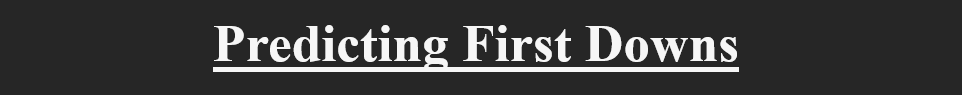

I used the data to explore yards gained in different situations and to predict whether the offense would get a first down (when they didn't lose yards from a penalty or penalties).

## **EDA**

I got rid of all the columns with NA's from the plays dataset, except for offense formation, and then got rid of rows with NAs. After that, I split the data by offense formation and looked at yards gained for different formations.

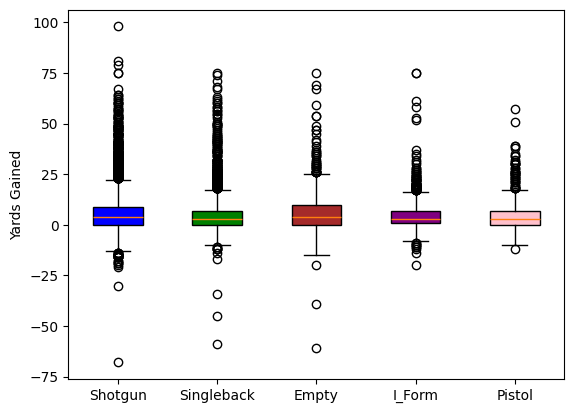

As one can see there are a lot of outlier values. Excluding the outliers, the Empty boxplot has the highest maximum, about 25, but also the lowest minimum of about 15, making it risky.

I split the data by run and passing plays.

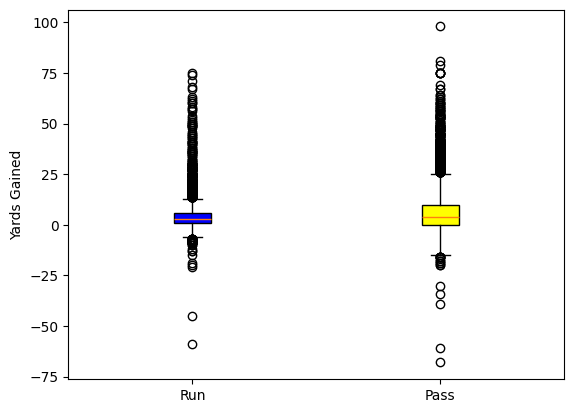

A lot of outlier values again. Excluding them, passing plays has more plays where a lot of yards were gained but also more plays where a lot were lost. therefore, run plays seem like the less risky option, but the gains tend to be smaller.

After this, I combined the two plots, into one plot that looked at different formations by run or pass. I excluded Empty run since there were only 47 points.

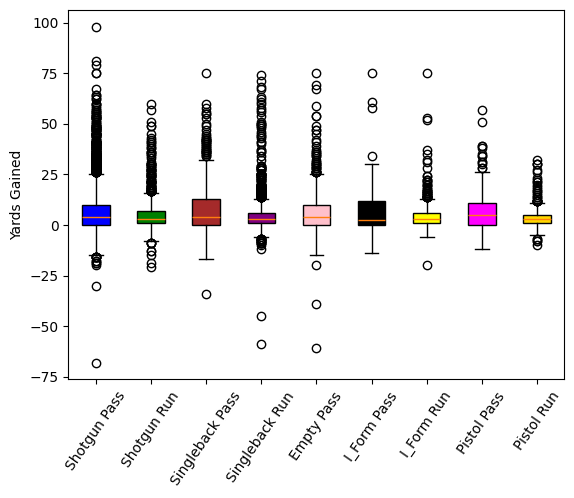

The Singleback Pass has the biggest maximum of over 25 yards, but also the lowest minimum of about 15 when excluding outliers. Below are the medians of each dataset and number of plays in each dataset:

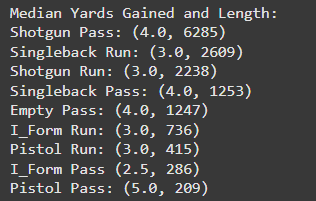

Pistol pass has the highest median, but also only about 200 plays, therefore with more plays it could be lower. Based on this and the above boxplots, it seems singleback pass should be ran a lot if a team has good pass protection.

## **Preprocessing**

I merged all 9 weeks of the tracking data together and then got all the data from before the snap. I then used sorting, group by, and iloc to just get the data from the last moment before the ball was snapped for each play instead of the data from all the moments before the ball was snapped, significantly reducing the size of the dataframe. After this, I merged this set with the players dataset on nflID using a left join.

I took this merged dataset and made new columns for the player data so now the data does not take up many rows, significantly reducing the length of the dataframe. Now, there is only one row for each play with the weights, position, and other info. of every player on the field for the play, along with the team data.

I performed an inner join with this dataset and the plays dataset on playID and gameID. I then filtered out plays where a penalty or penalties caused the offense to lose yards. I dropped QB kneels and made a new column that indicated 1 if it there was a pass on the play and 0 if there was not. I changed the values of yardlineSide to 1 if it was the possession team and 0 if it was not.

I made a variable for whether a team got a first down or not. I made a variable for if offensive team got last first down attempt. I made variables for before each play: number of plays offensive team ran, number of first downs offensive team got, previous first downs/previous plays, total yards gained, and total yards gained/previous plays. I got the same for the defensive team on each play and also got the previous yards allowed on the play before.

I made variables for product of x position and y position for each player on the field for each play. I used a label encoder to convert categorical variables to numeric. I made new variables by multiplying the dataset by offense formation, receiver alignment, down, and yards to go. I also made new variables by multiplying the dataset that was multiplied with yards to go by offense formation, receiver alignment, and down.

I merged this dataset with the games dataset using an inner join. I merged this dataset with an SOS dataset I made from data on TeamRankings.com, which has the SOS and SOS rank for each team on different dates. I merged it so it would get the SOS of the team from before the game. Now that the dataframe was a different size I made the variable for whether a team got a first down again. I filled NA values and made new variables by multiplying the dataset by SOS and SOS rank.

## **Getting Inputs for ML Models**

I made a function to oversample and under sample a training set. I made a function to split data, scale data, and call a function that gets inputs by computing Pearson's correlation between potential input columns and target. I made a function to reduce the training inputs using PCA or LLE reduction. I also made a function to drop features that are correlated with each other.

## **Model:**

I ran logistic regression, random forest classifier, and XG Boost classifier without tuning and with hyperparameter tuning. Through hyperparameter tuning a logistic regression model with PCA reduced features, the best hyperparameters were {'C': 8.5736e-05, 'penalty': 'l2', 'solver': 'saga'}. The resulting model's trainign set had 66% accuracy and the test set had 69% accuracy.

The features were chosen using a correlation threshold of .05, reducing the features to 850 features using PCA and then oversampling and under sampling. I did not drop features that correlated with each other.

**Training Results:**

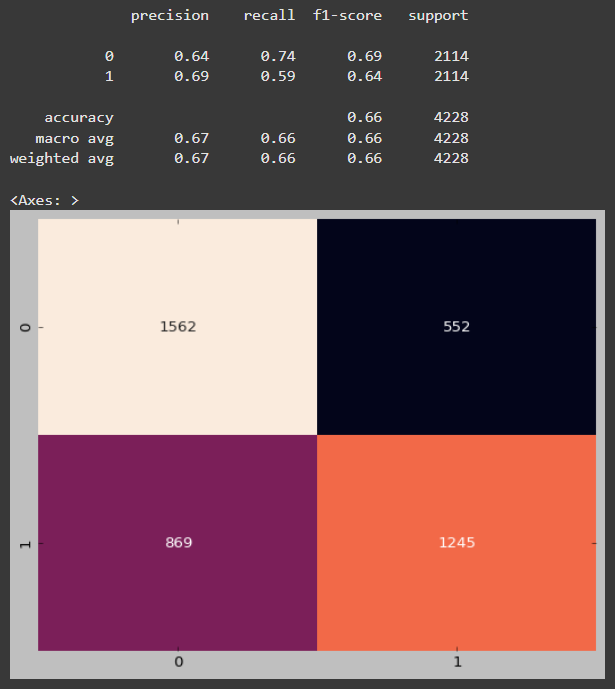

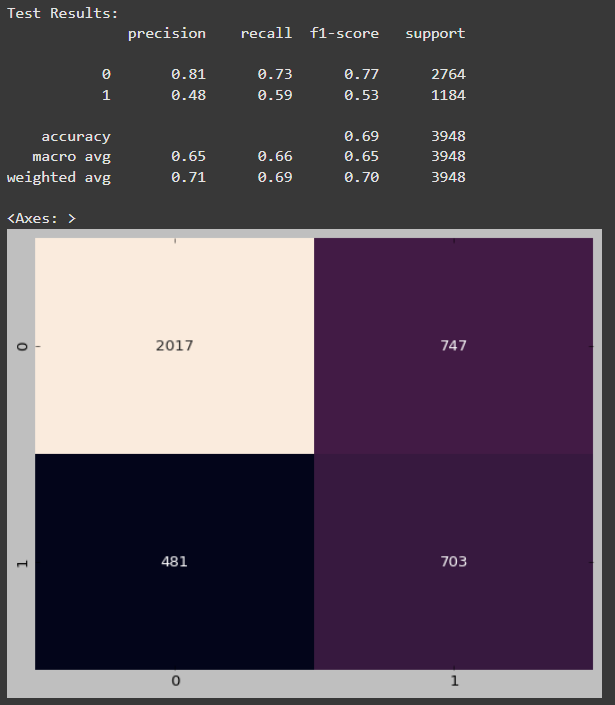

The test set predicted 703 values of 1, (did get first down), correct and 481 wrong. It predicted 2017 values of 0, (did not get first down), correct and 747 wrong. It was rellay precise in predicting not getting a firts down with .81 precison, but not precise predicting getting a firts down with only .48 precision.

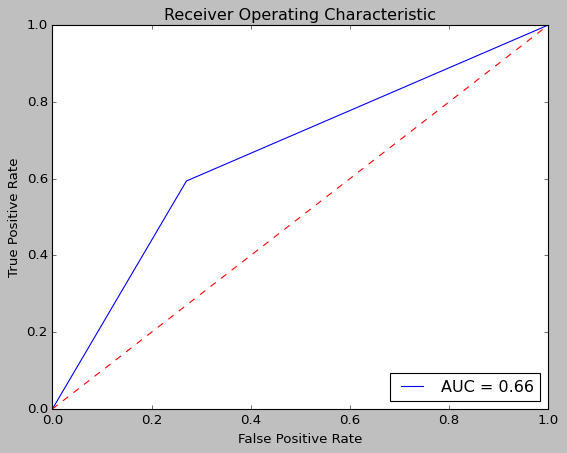

The ROC curve heads towards the upper left corner away from the diagonal line, which is good, but it could be better as it could be closer to the corner and look smoother (not have a sharp change of direction at about (.25, .6)).

Before games, NFL teams could see how effective certain plays are against certain defenses using this model. During games, they could have AI get all the data points before the ball is hiked. If the model predicts the team won't get a first down then the team can tell the QB to audible. Also, teams could build the model with more data than about half a season to make it more accurate.